In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

%matplotlib inline

In [2]:
data = np.array([0,1,2,3,4,5]) #would be some arbitrary 1D array
m = 3
def f1():
    L = np.zeros((m+1,m+1))
    for i in range(2*m, m-1, -1):
        c = 0
        for j in range(i, i-m-1, -1):
            L[2 * m - i, c] = np.sum(data ** j)
            c += 1        
    

def f2():
    L=[]
    for i in range(2*m, m-1, -1):
        temp = []
        for j in range(i, i-m-1, -1):
            s = 0
            for k in range(len(data)):
                s += np.sum(data[k]**j)
            temp.append(s)
        L.append(temp)

    L = np.array(L)


# Define the setup for timeit
setup = """
import numpy as np
m = 15
data = np.array([0, 1, 2, 3, 4, 5])

def f1():
    L = np.zeros((m+1,m+1))
    for i in range(2*m, m-1, -1):
        c = 0
        for j in range(i, i-m-1, -1):
            L[2 * m - i, c] = np.sum(data ** j)
            c += 1
"""

# Measure the execution time using timeit
execution_time = timeit.timeit("f1()", setup=setup, number=1000)

print("numpy method time is:", execution_time, " seconds")

# Define the setup for timeit
setup = """
import numpy as np
m = 15
data = np.array([0, 1, 2, 3, 4, 5])

def f2():
    L=[]
    for i in range(2*m, m-1, -1):
        temp = []
        for j in range(i, i-m-1, -1):
            s = 0
            for k in range(len(data)):
                s += np.sum(data[k]**j)
            temp.append(s)
        L.append(temp)

    L = np.array(L)
    
"""

# Measure the execution time using timeit
execution_time = timeit.timeit("f2()", setup=setup, number=1000)

print("py method time is:", execution_time, " seconds")

numpy method time is: 1.3793626999995467  seconds


<timeit-src>:15: RuntimeWarning: overflow encountered in long_scalars


py method time is: 8.239535700000488  seconds


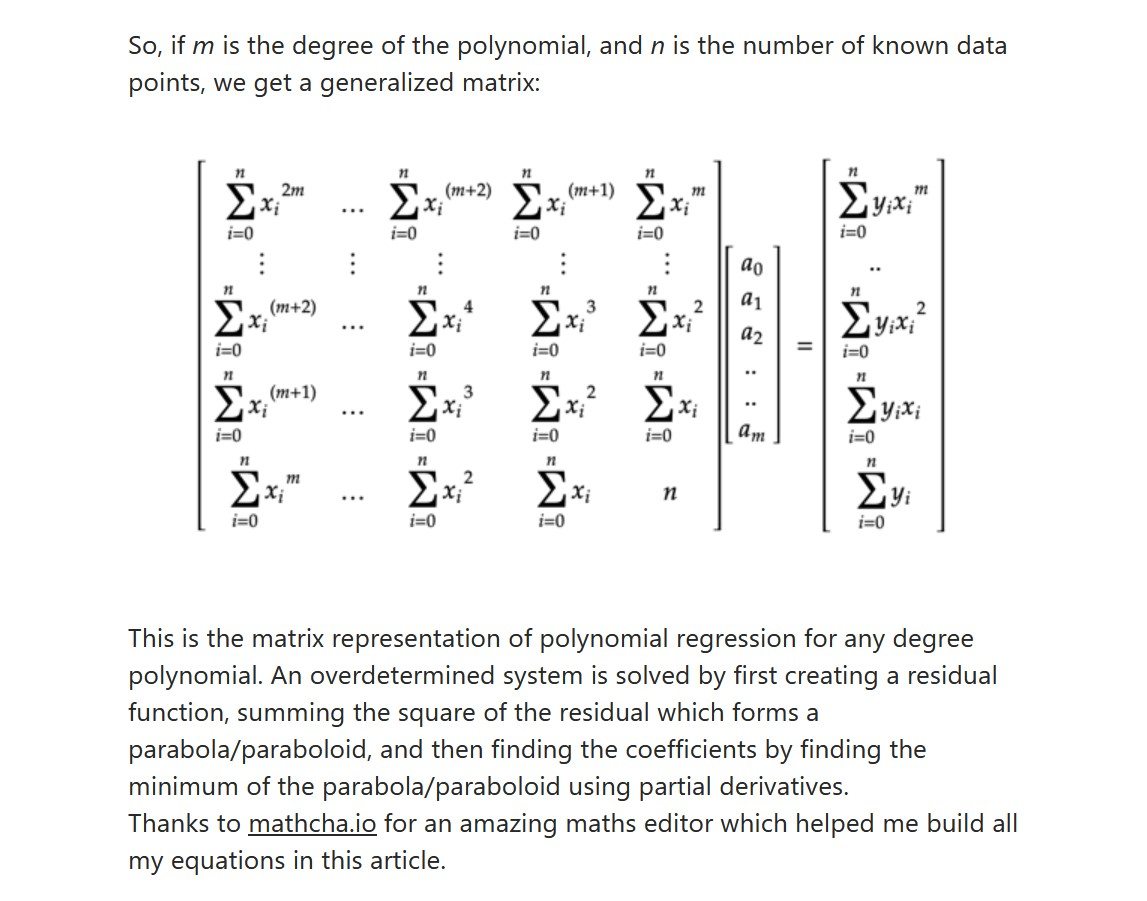
<!-- <div>
<img src="poly_coeff_matrix.jpg" width="600"/>
</div> -->

https://muthu.co/maths-behind-polynomial-regression/ (link for article above)

In [3]:
e = np.zeros((10,1))
e

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [4]:
np.sum(data**13)
y = np.array([1,2,3,4])
y = np.array(y)
y

array([1, 2, 3, 4])

In [15]:
m = 5
def making_A(m, x):
    x = np.array(x)
    data = x
    L = np.zeros((m+1,m+1))
    for i in range(2*m, m-1, -1):
        c = 0
        for j in range(i, i-m-1, -1):
            L[2 * m - i, c] = np.sum(data ** j)
            c += 1
            
    return L

def making_B(m,y,x):
    y = np.array(y)
    x = np.array(x)
    data=x
    L = np.zeros((m+1,1))
    for i in range(m, -1,-1):
        L[m-i] = np.sum(y*(data**i))
    
    return L

def solve_polyfit(A,B,m):
    coeffs = np.zeros((m,1))
    coeffs = np.linalg.solve(A,B)
    coeffs = np.flip(coeffs)
    return coeffs

def check(coeffs, X, Y):
    def PolyCoefficients(x, coeffs):
        o = len(coeffs)
        y = 0
        for i in range(o):
            y += coeffs[i][0]*x**i
        return y

    e = np.zeros(len(X))
    for i in range(len(X)):
        for j in range(len(coeffs)):
            e[i] += X[i]**j * coeffs[j][0]
    
#     fig, axes = plt.subplot(nrow=1, ncols=1)
#     axes.plot(X,PolyCoefficients(X, coeffs), color="green")
#     axes.plot(X,Y, label=str(len(coeffs)), color="red")
    return PolyCoefficients(X, coeffs)
    
def rmse(coeffs, X, Y, st):
    Xt = X[st:]
    e = np.zeros(len(Xt))
    for i in range(len(Xt)):
        for j in range(len(coeffs)):
            e[i] += Xt[i]**j * coeffs[j]
            
    test = np.array(Y[st:])
    err = test - e
    rmserr = ((np.sum(err**2)/len(err)))**(1/2)
    return rmserr

In [6]:
# Making some synthetic datasets
X = np.linspace(-3,2.5,200)
num_points = 100
x_values = np.random.rand(num_points)
# Y = X**4 
# Y = (14 + 4*X - 4*X**2 + X**3 - 2*X**4 + 12*X**5) 
Y = X**6+2*X**5-8*X**4-14*X**3+11*X**2+28*X+12

noise = np.random.randn(*Y.shape)
Y = Y + 4*noise

m = 5
coeffs = solve_polyfit(making_A(m,X),making_B(m,Y,X),m)
coeffs = np.flip(coeffs) # To make the alignment of the coeffs of powers as I want. It is otherwise reversed
for i in coeffs:
    print(type(i), i)

<class 'numpy.ndarray'> [0.56043072]
<class 'numpy.ndarray'> [1.60468258]
<class 'numpy.ndarray'> [-4.31737507]
<class 'numpy.ndarray'> [-12.2858019]
<class 'numpy.ndarray'> [15.8866506]
<class 'numpy.ndarray'> [20.37579384]


In [7]:
rmse(coeffs, X, Y, st=10)

648.6142911795755

In [8]:
def fit_model(X, Y, limit=15, print_graphs=False):
    mn = None
    model = None
    for m in range(0, limit):
        coeffs = solve_polyfit(making_A(m,X),making_B(m,Y,X),m)
    #     coeffs = np.flip(coeffs)
        model_out = check(coeffs, X, Y)
        rmserr = rmse(coeffs, X, Y, st=10)

        if (mn == None):
            mn = rmserr
            model = coeffs

        if (rmserr < mn):
            mn = rmserr
            model = coeffs
        
        if (not print_graphs):
            continue
            
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
        axes[0].scatter(X, Y)
        axes[0].set_title("data")

        axes[1].plot(X, model_out)
        axes[1].set_title("model output")

        axes[2].scatter(X, Y, color = 'green', label='data')
        axes[2].plot(X, model_out, color = 'blue', label='model')
        axes[2].set_title("Comparision")
        axes[2].legend()

        axes[3].scatter(model_out, abs(Y - model_out), color="red")
        axes[3].set_title("Residual")

        fig.suptitle(f'For m = {m}, rmserr = {rmserr}')

        plt.tight_layout()
        plt.show()

    return [mn, model, len(model)]

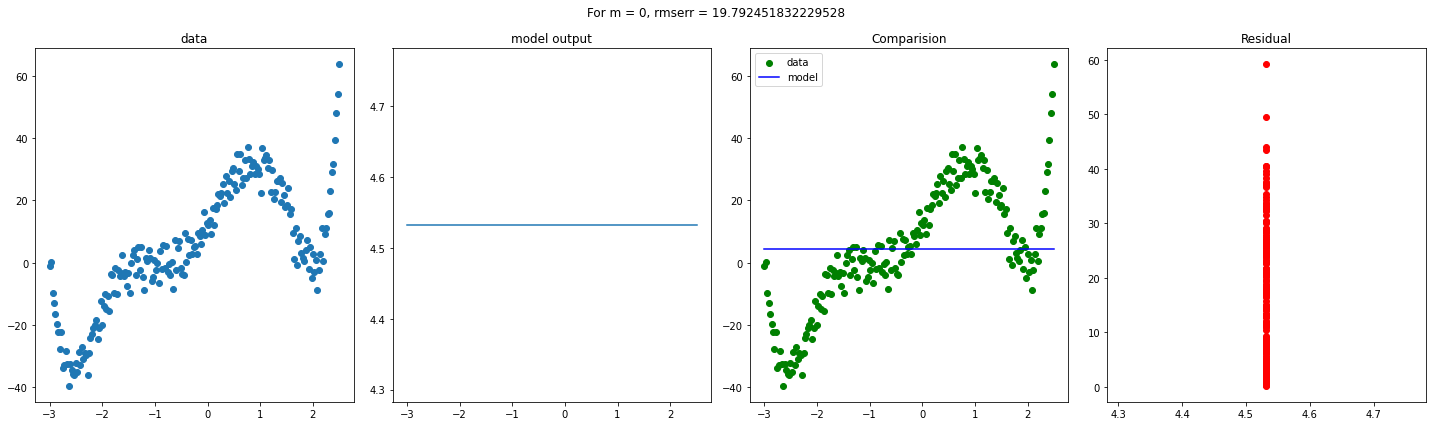

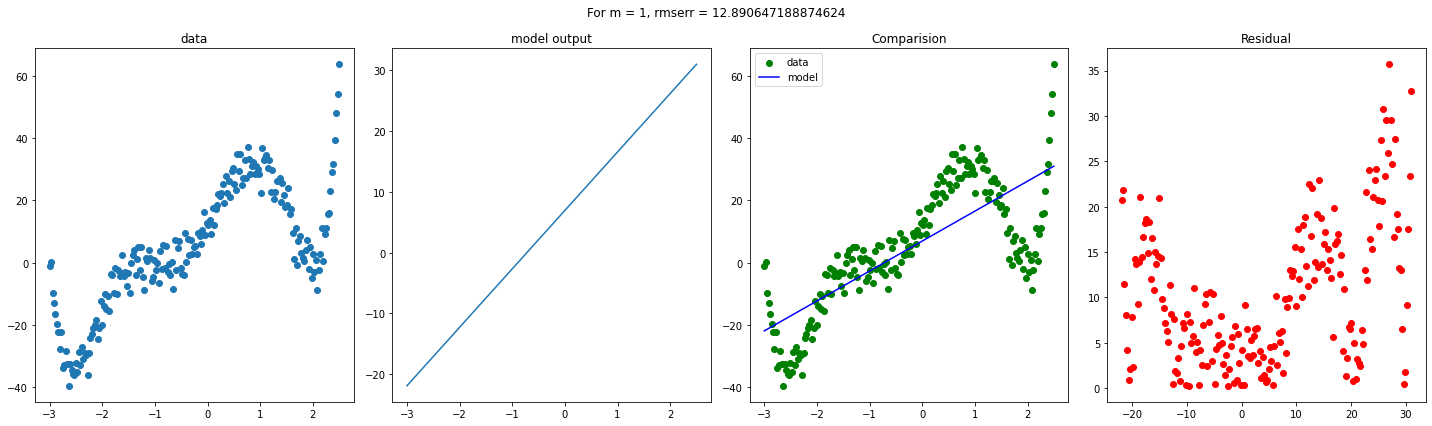

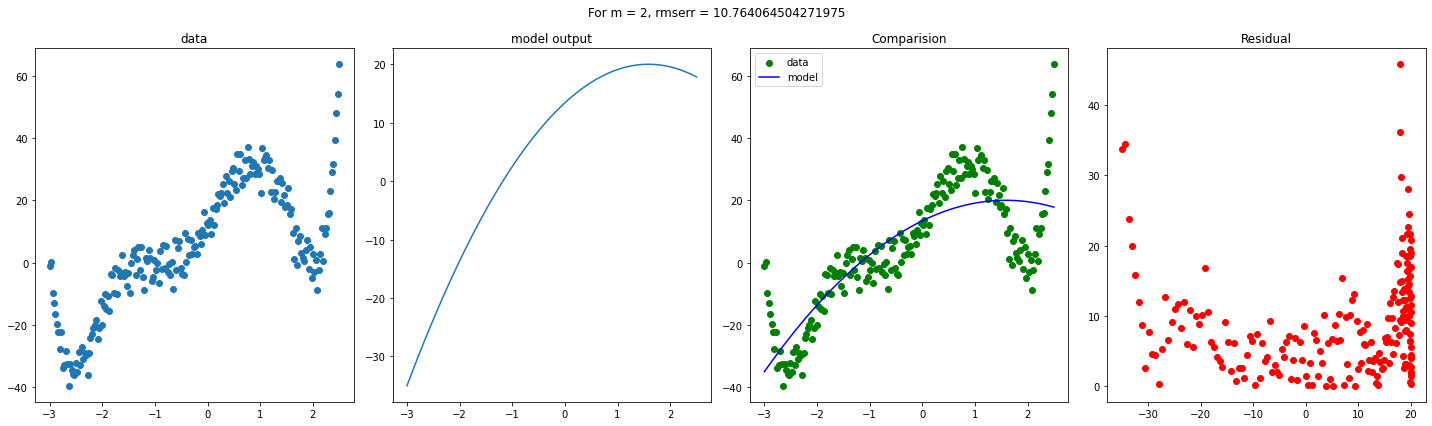

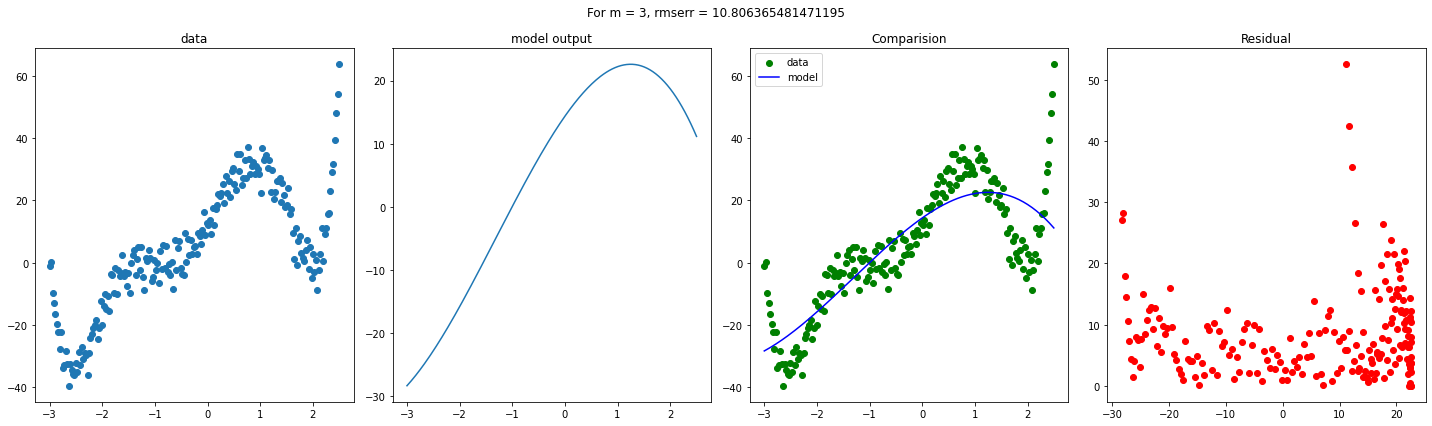

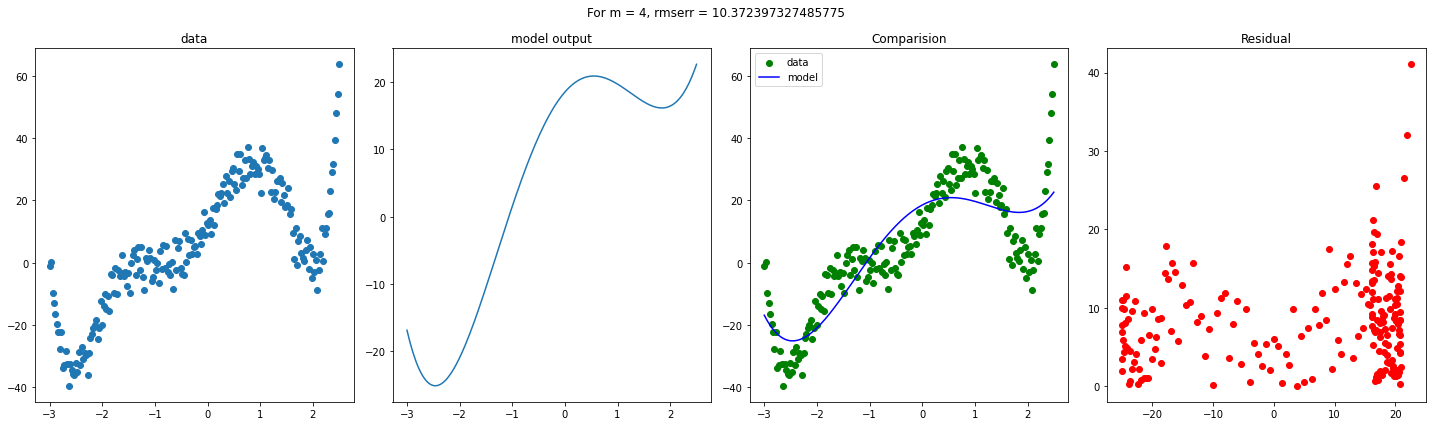

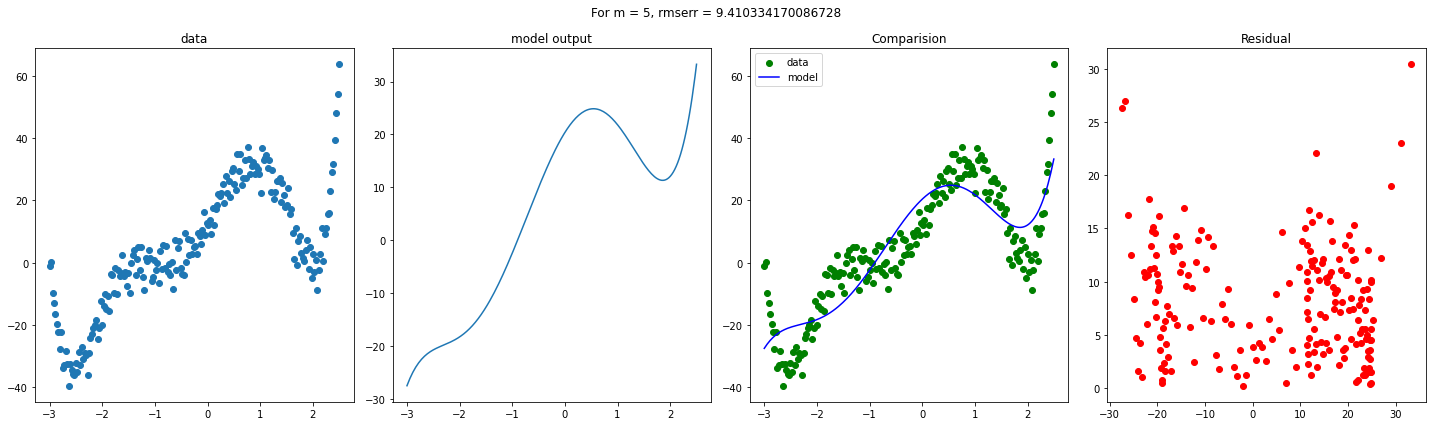

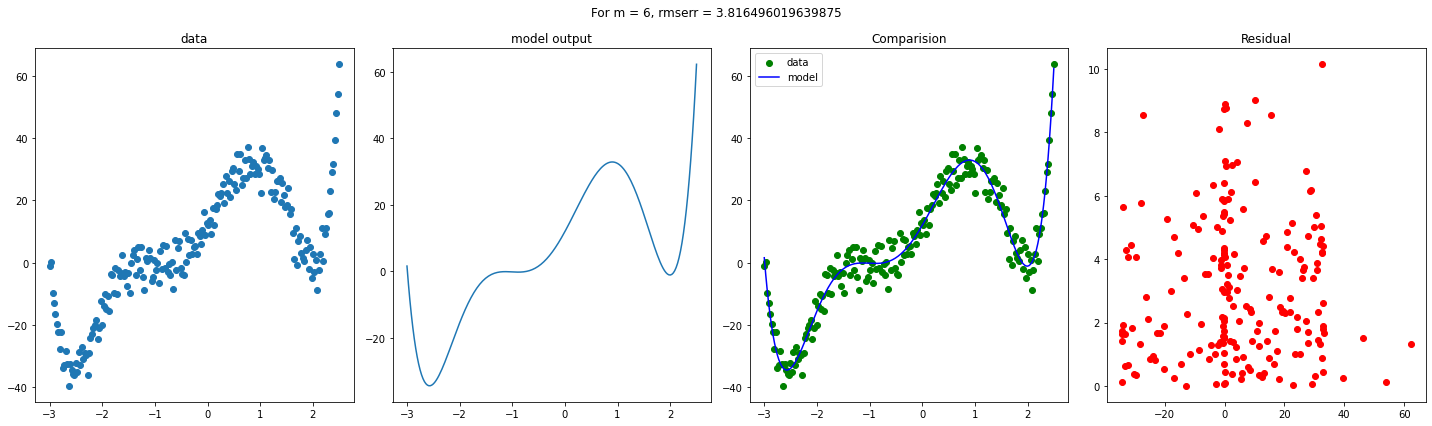

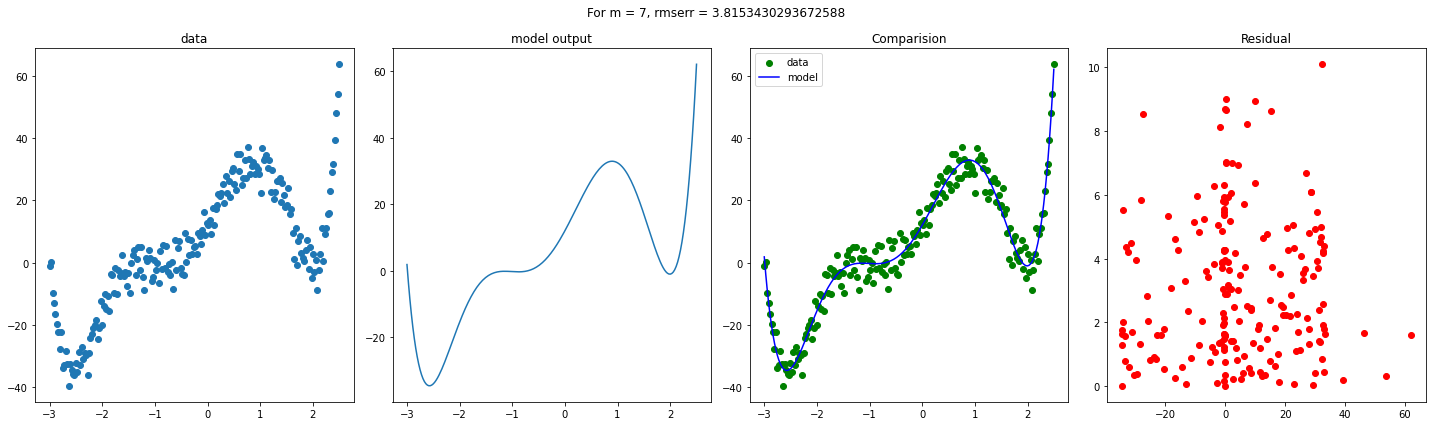

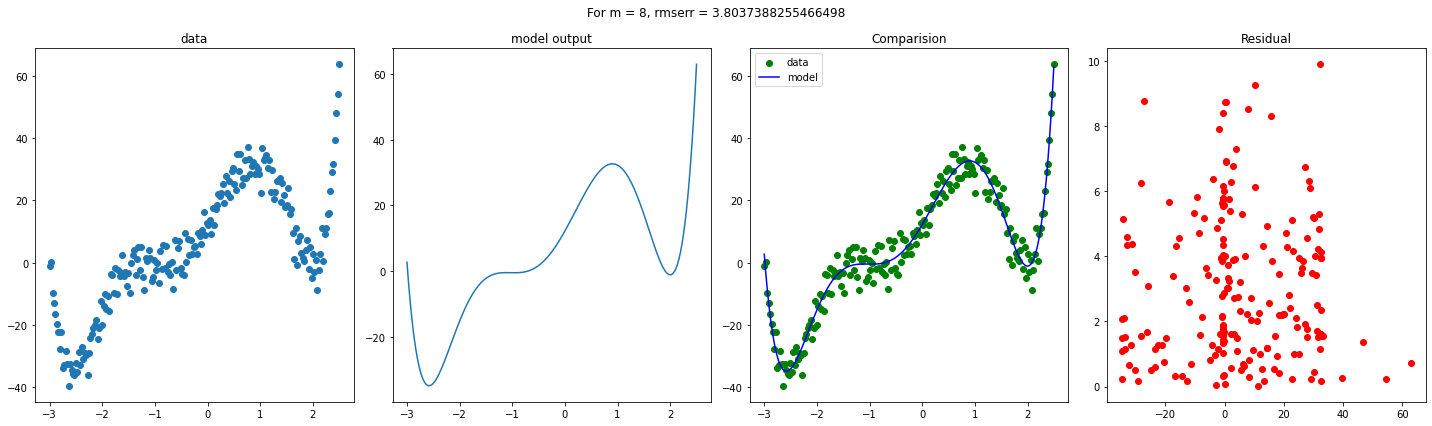

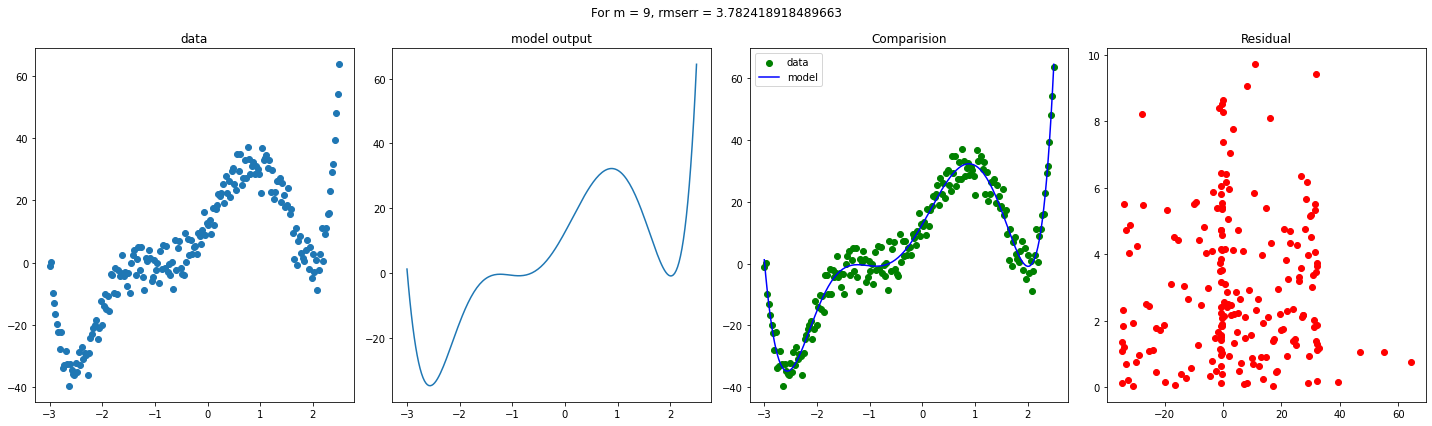

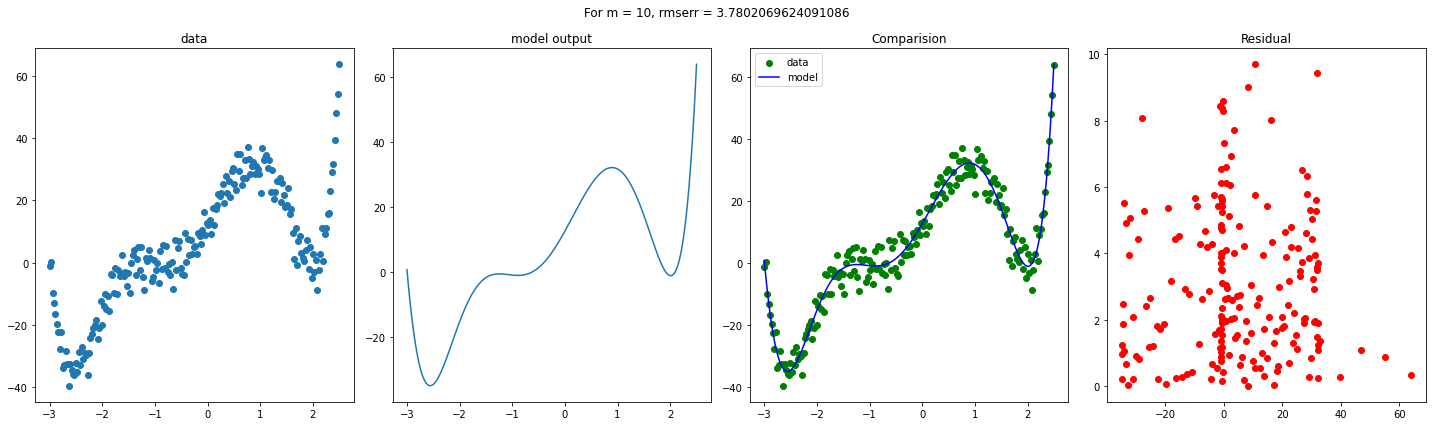

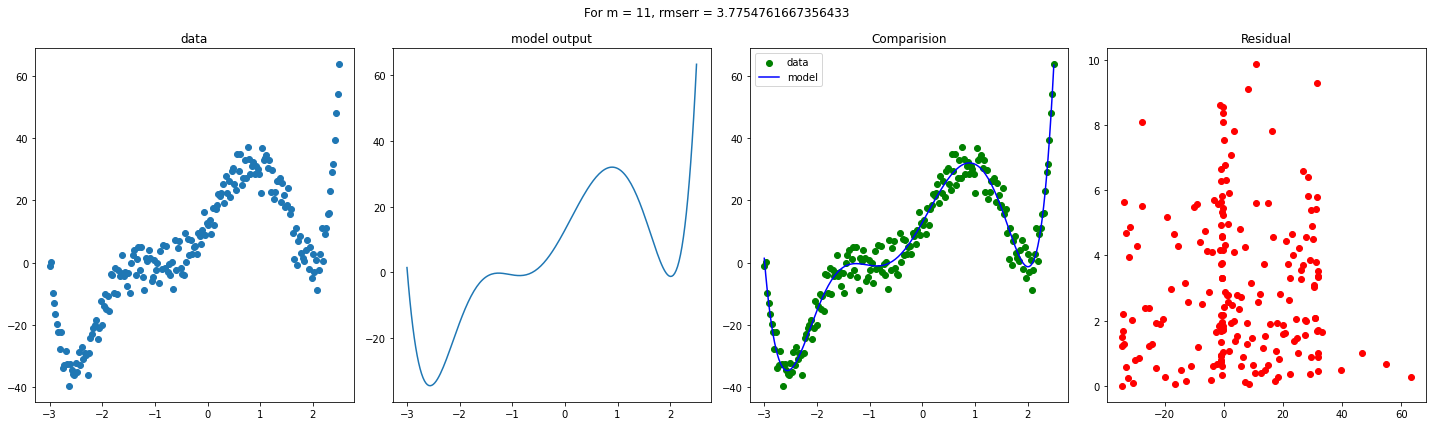

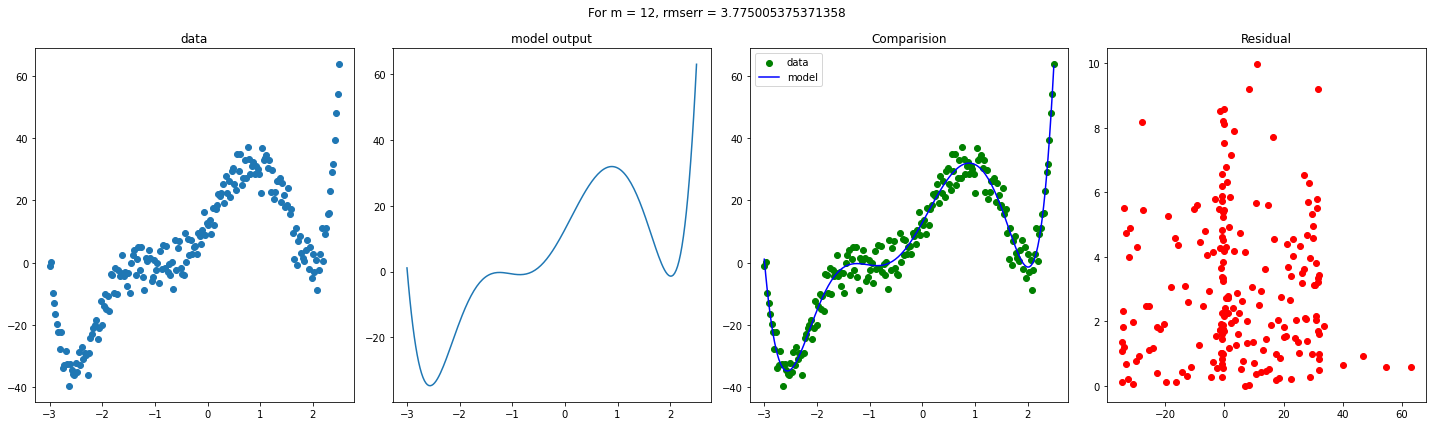

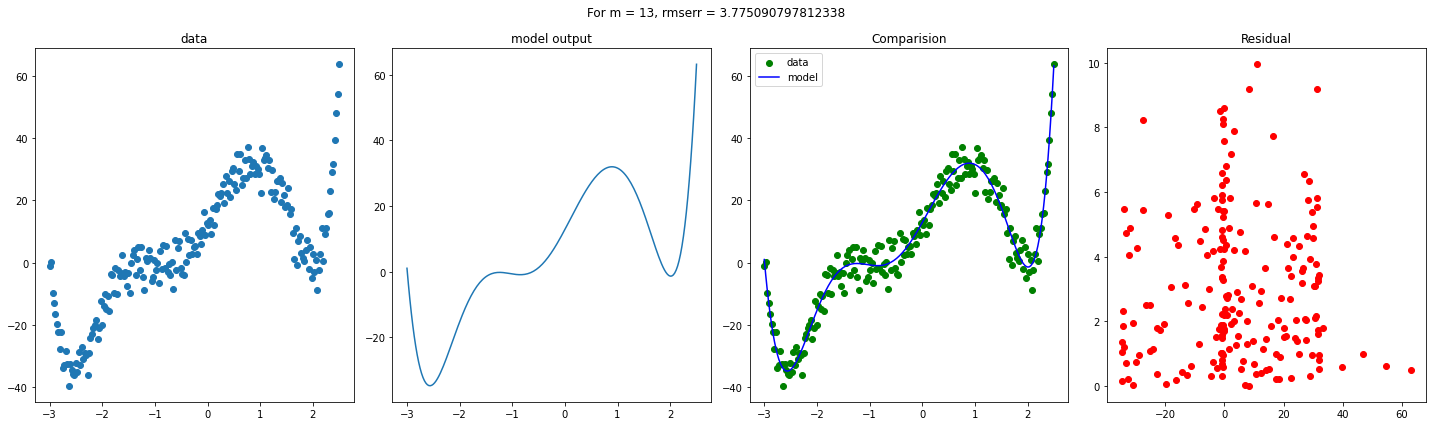

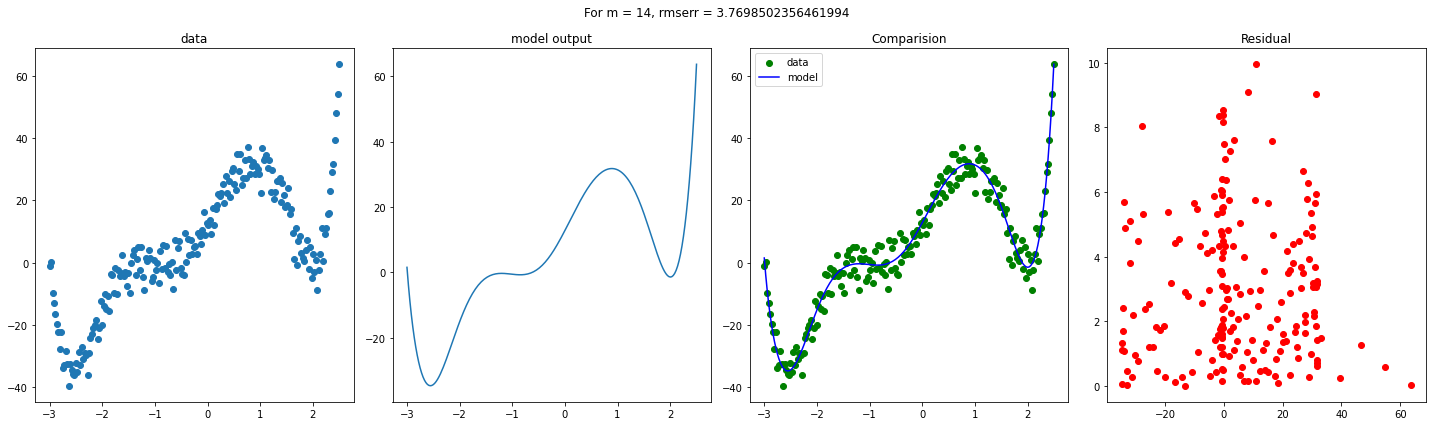

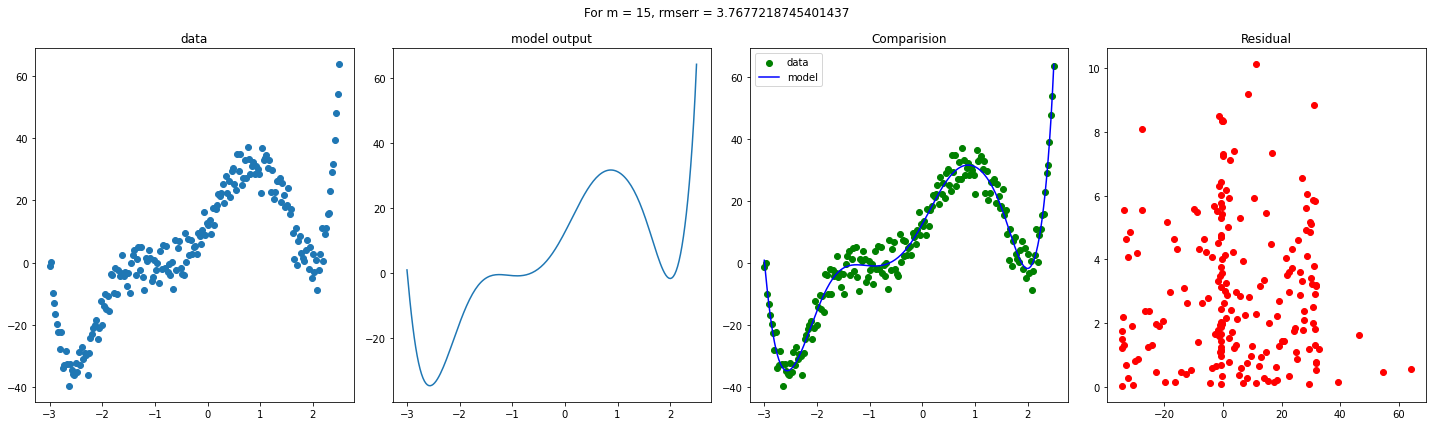

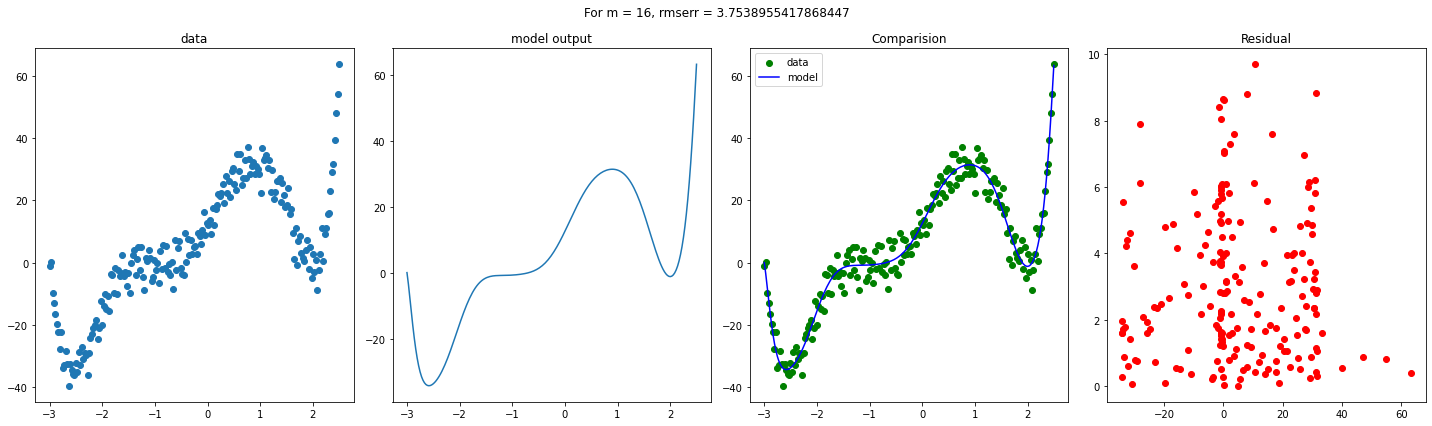

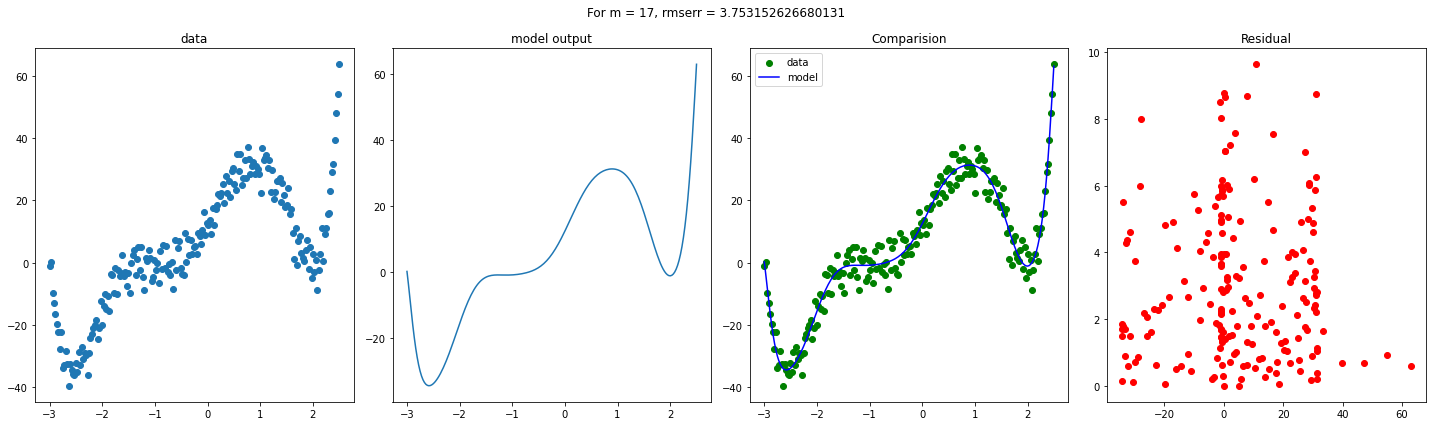

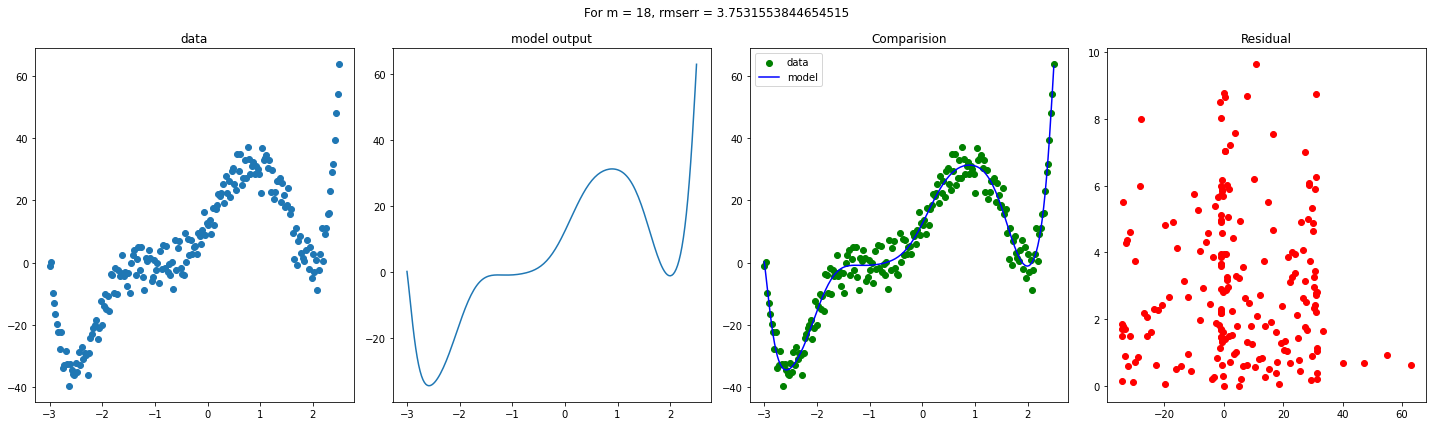

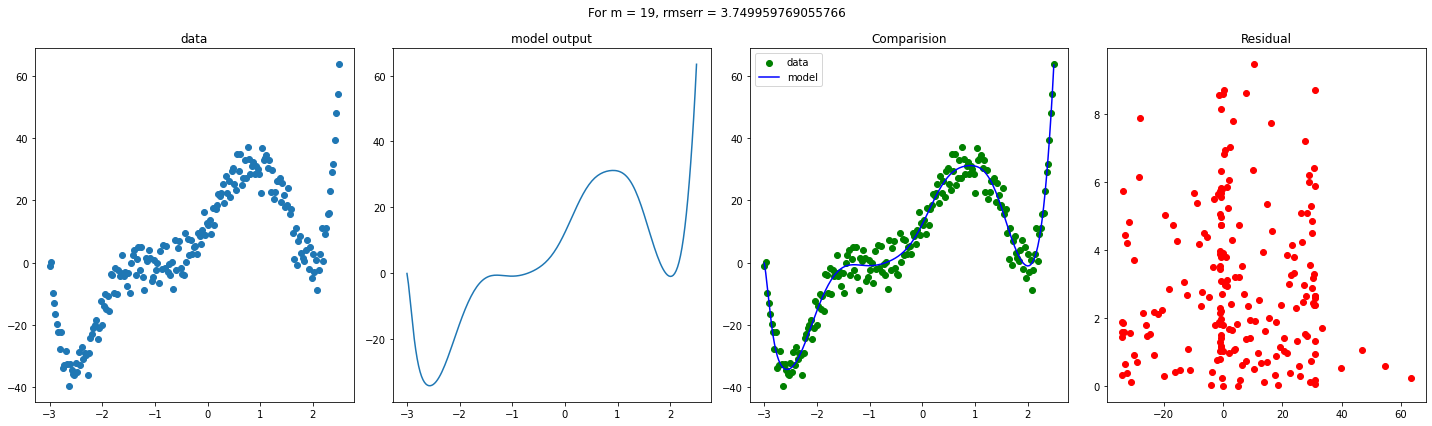

In [9]:
model = fit_model(X, Y, 20, True)[1]

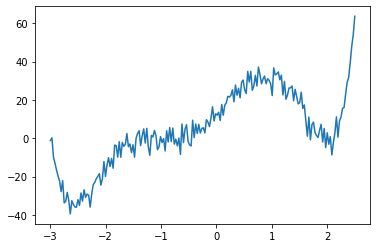

In [10]:
plt.plot(X,Y)

In [11]:
def find_output(model, X):
    e = np.zeros(len(X))
    for i in range(len(X)):
        for j in range(len(model)):
            e[i] += X[i]**j * model[j]
    
    return e



[[ 1.23124525e+01]
 [ 3.33958610e+01]
 [ 1.65759386e+01]
 [-3.61941581e+01]
 [-3.88844334e+01]
 [ 3.38385884e+01]
 [ 4.86088770e+01]
 [-2.04834994e+01]
 [-3.49076237e+01]
 [ 5.95942169e+00]
 [ 1.43671152e+01]
 [-3.48913381e-01]
 [-3.51189407e+00]
 [-2.42227360e-01]
 [ 5.06331779e-01]
 [ 6.70638768e-02]
 [-3.97673596e-02]
 [-7.06538357e-03]
 [ 1.31200791e-03]
 [ 2.76971428e-04]] [33.395861] [12.31245253]


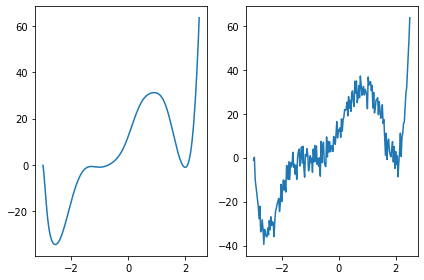

In [12]:
fig, axes = plt.subplots(nrows=1, ncols = 2)
new_X = np.linspace(-3,2.5,200)
mod_o = find_output(model, new_X)
print(model, model[1], model[0])
axes[0].plot(new_X, mod_o)
axes[1].plot(X, Y)
plt.tight_layout()

In [8]:
# Next goal: make a function that makes a regression model for every single value of m, and print all the graphs + rmse 
# values.


In [37]:
#actual model class code. I will comment this in a later commit, but it should be fairly self explanatory.
import numpy as np
import matplotlib.pyplot as plt

class BadInputError(Exception):
    def __init__(self, message="Bad input error"):
        self.message = message
        super().__init__(self.message)

class PolyFitter:
    def __init__(self, m=15):
        self._im = m
        self._X_train = []
        self._Y_train = []
        self._X_test = []
        self._Y_test = []
    
    def split_train_test(self, X, Y, train_ratio=.8):
        try:
            if (len(X) != len(Y)):
                raise BadInputError("dependent and independent variable lengths do not match")
        except BadInputError as err:
            print(err)
        
        size = int(len(X) * train_ratio)
        
        temp = np.random.choice(len(X), len(X), replace=False)
    
        indices, indices1 = temp[:size], temp[size:]
        
        # Assigning train data
        
        self._X_train = X[indices]
        self._Y_train = Y[indices]
        
        indices1 = np.array(indices1)
                
        # Assigning test data
        self._X_test = X[indices1]
        self._Y_test = Y[indices1]
    
        test_sorted_indices = np.argsort(self._X_test)
        train_sorted_indices = np.argsort(self._X_train)

        self._X_test = self._X_test[test_sorted_indices]
        self._X_train = self._X_train[train_sorted_indices]
        
        self._Y_test = self._Y_test[test_sorted_indices]
        self._Y_train = self._Y_train[train_sorted_indices]

        
        return [self._X_train, self._Y_train, self._X_test, self._Y_test]
    
    def making_A(self, m, x):
        x = np.array(x)
        data = x
        L = np.zeros((m+1,m+1))
        for i in range(2*m, m-1, -1):
            c = 0
            for j in range(i, i-m-1, -1):
                L[2 * m - i, c] = np.sum(data ** j)
                c += 1
            
        return L

    def making_B(self,m,y,x):
        y = np.array(y)
        x = np.array(x)
        data=x
        L = np.zeros((m+1,1))
        for i in range(m, -1,-1):
            L[m-i] = np.sum(y*(data**i))

        return L

    def solve_polyfit(self, A,B,m):
        coeffs = np.zeros((m,1))
        coeffs = np.linalg.solve(A,B)
        coeffs = np.flip(coeffs)
        return coeffs

    def check(self, coeffs, X):
        def PolyCoefficients(x, coeffs):
            o = len(coeffs)
            y = 0
            for i in range(o):
                y += coeffs[i][0]*x**i
            return y
        e = np.zeros(len(X))
        for i in range(len(X)):
            for j in range(len(coeffs)):
                e[i] += X[i]**j * coeffs[j][0]
                
        return PolyCoefficients(X, coeffs)

    def rmse(self, coeffs, Xt, Yt):
        e = np.zeros(len(Xt))
        for i in range(len(Xt)):
            for j in range(len(coeffs)):
                e[i] += Xt[i]**j * coeffs[j]

        test = Yt
        err = test - e
        rmserr = ((np.sum(err**2)/len(err)))**(1/2)
        return rmserr
    
    def make_graphs(self, X, Y, model_out, rmserr, m):
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

        model_out_sorted = model_out
        axes[0].scatter(X, Y)
        axes[0].set_title("data")
        axes[0].axhline(0, color='black', linewidth=0.5)
        axes[0].axvline(0, color='black', linewidth=0.5)

        axes[1].plot(X, model_out)
        axes[1].set_title("model output")
        axes[1].axhline(0, color='black', linewidth=0.5)
        axes[1].axvline(0, color='black', linewidth=0.5)

        axes[2].scatter(X, Y, color='green', label='data')
        axes[2].plot(X, model_out, color='blue', label='model')
        axes[2].set_title("Comparison")
        axes[2].legend()
        axes[2].axhline(0, color='black', linewidth=0.5)
        axes[2].axvline(0, color='black', linewidth=0.5)

        axes[3].scatter(model_out, abs(Y - model_out), color="red")
        axes[3].set_title("Residual")
        axes[3].axhline(0, color='black', linewidth=0.5)
        axes[3].axvline(0, color='black', linewidth=0.5)

        fig.suptitle(f'For m = {m}, rmserr = {rmserr}')

        plt.tight_layout()
        plt.show()

        
    
    def fit_model(self, X = None, Y = None, limit=15, print_graphs=False):
        if (X == None):
            X = self._X_train
        if (Y == None):
            Y = self._Y_train
        try:
            if (X == []) or (Y == []):
                raise BadInputError("No data was provided to the model")
        
        except BadInputError as err:
            print(err)
        
        mn = None
        model = None
        for m in range(0, limit):
            coeffs = self.solve_polyfit(self.making_A(m,X), self.making_B(m,Y,X),m)
            model_out = self.check(coeffs, X)
            rmserr = self.rmse(coeffs, self._X_test, self._Y_test)

            if (mn == None):
                mn = rmserr
                model = coeffs

            if (rmserr < mn):
                mn = rmserr
                model = coeffs

            if (print_graphs):
                self.make_graphs(X, Y, model_out, rmserr, m)
                

        return [mn, model, len(model)]

X = np.linspace(-3,2.5,400)

Y = X**6+2*X**5-8*X**4-14*X**3+11*X**2+28*X+12

noise = np.random.randn(*Y.shape)
Y = Y + 5*noise



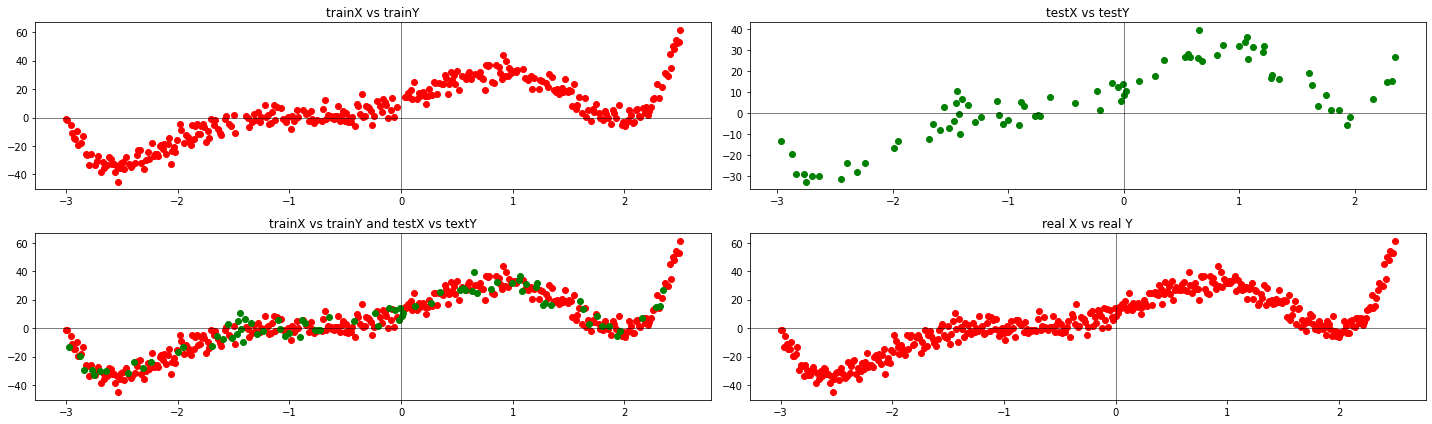

In [38]:
PF = PolyFitter(m = 15)
o = PF.split_train_test(X, Y)   # testing the split train test
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,6))

axes[0][0].scatter(o[0], o[1], color='red')
axes[0][0].axhline(0, color='black', linewidth=0.5)
axes[0][0].axvline(0, color='black', linewidth=0.5)
axes[0][0].set_title("trainX vs trainY")

axes[0][1].scatter(o[2],o[3], color='green')
axes[0][1].axhline(0, color='black', linewidth=0.5)
axes[0][1].axvline(0, color='black', linewidth=0.5)
axes[0][1].set_title("testX vs testY")

axes[1][0].scatter(o[0], o[1], color='red')
axes[1][0].scatter(o[2],o[3], color='green')
axes[1][0].axhline(0, color='black', linewidth=0.5)
axes[1][0].axvline(0, color='black', linewidth=0.5)
axes[1][0].set_title("trainX vs trainY and testX vs textY")

axes[1][1].scatter(X, Y, color='red')
axes[1][1].axhline(0, color='black', linewidth=0.5)
axes[1][1].axvline(0, color='black', linewidth=0.5)
axes[1][1].set_title("real X vs real Y")

plt.tight_layout()
plt.plot()
x = 1

C:\Users\sidha\AppData\Local\Temp\ipykernel_16792\2726310193.py:153: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (X == []) or (Y == []):


<class 'numpy.ndarray'>


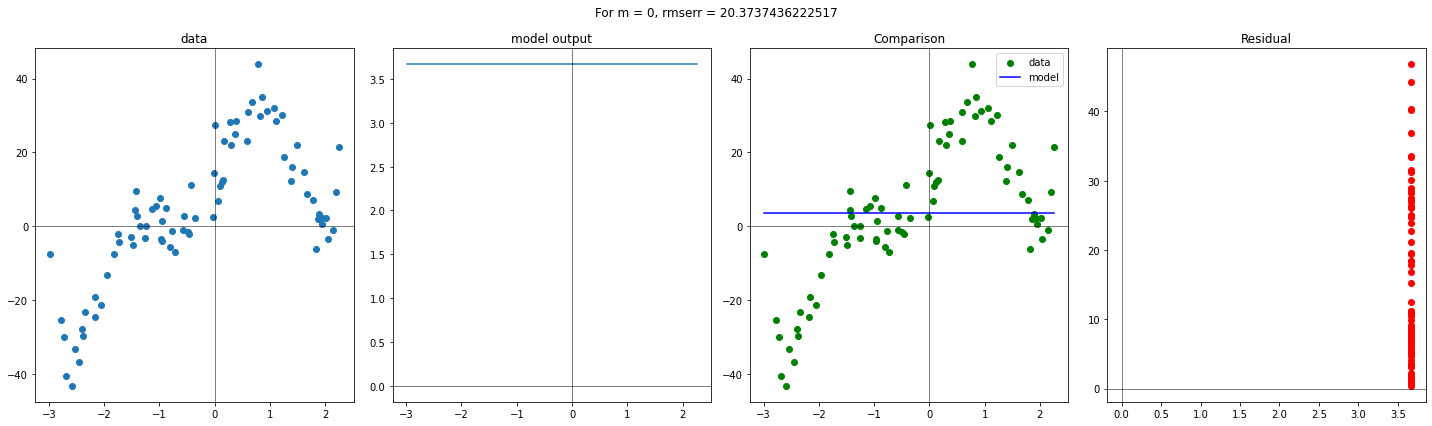

<class 'numpy.ndarray'>


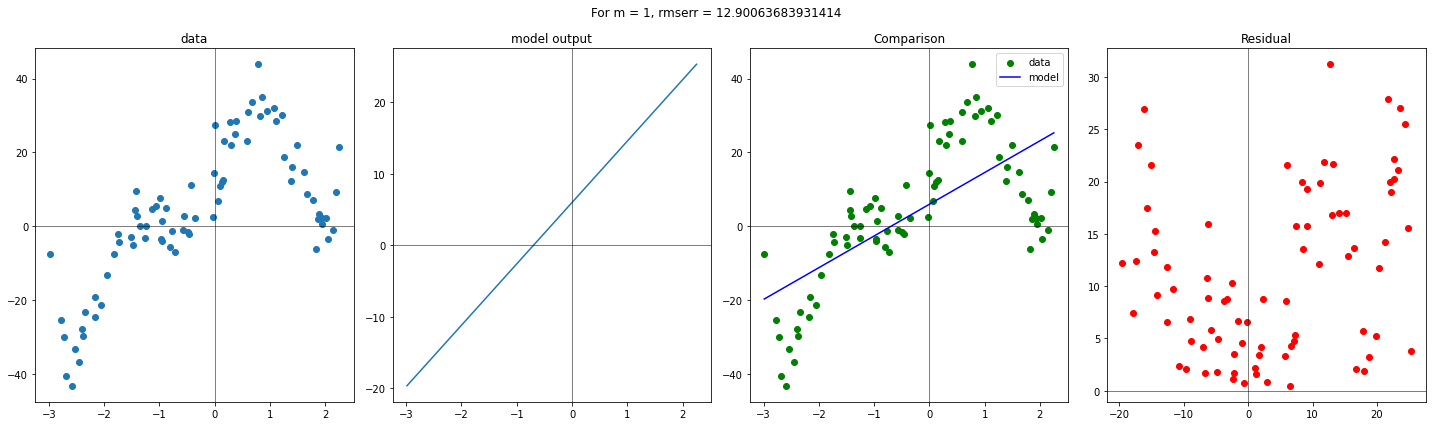

<class 'numpy.ndarray'>


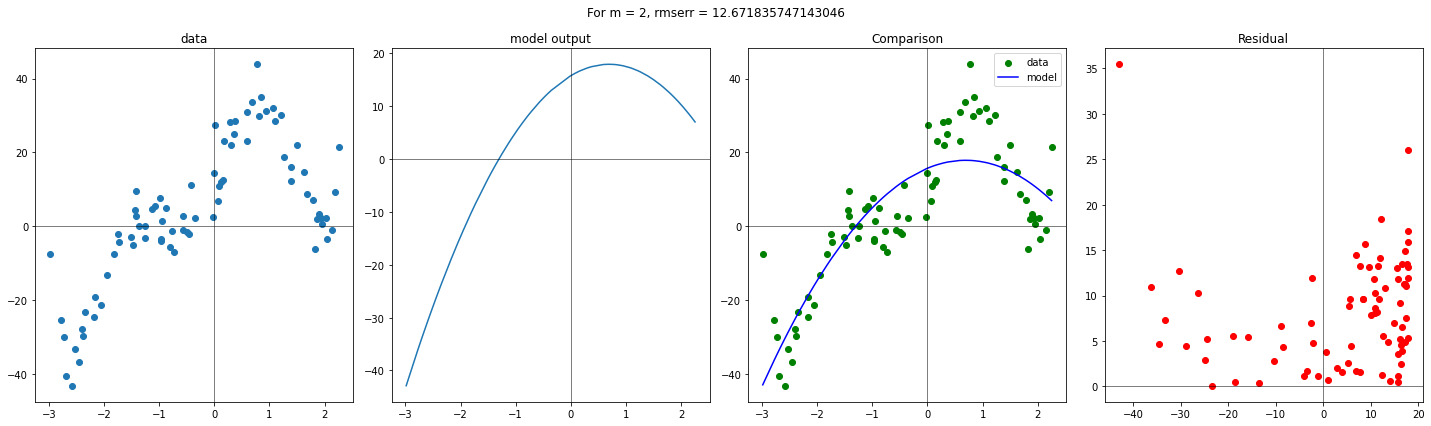

<class 'numpy.ndarray'>


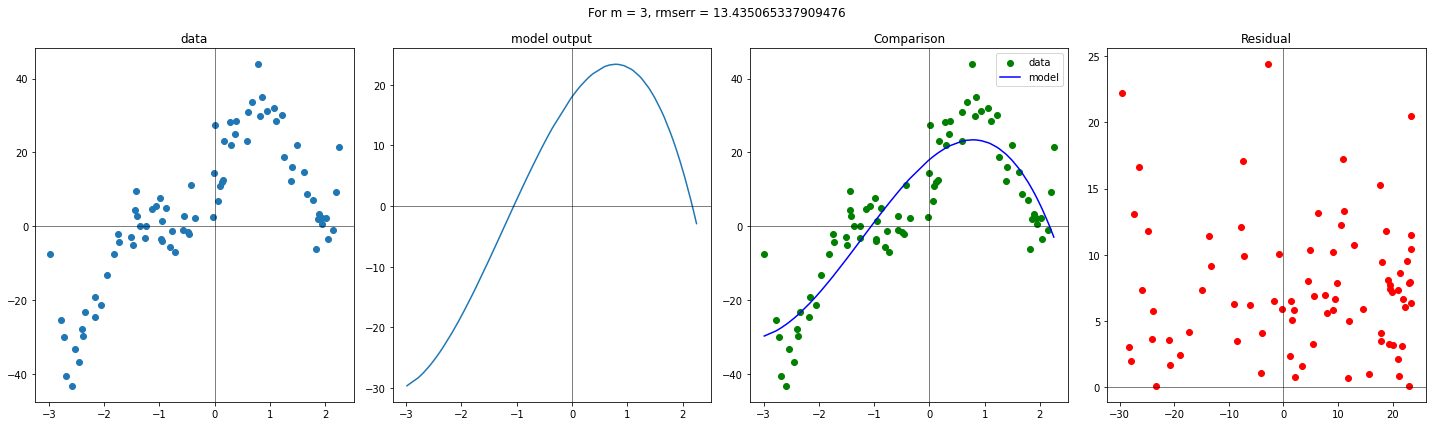

<class 'numpy.ndarray'>


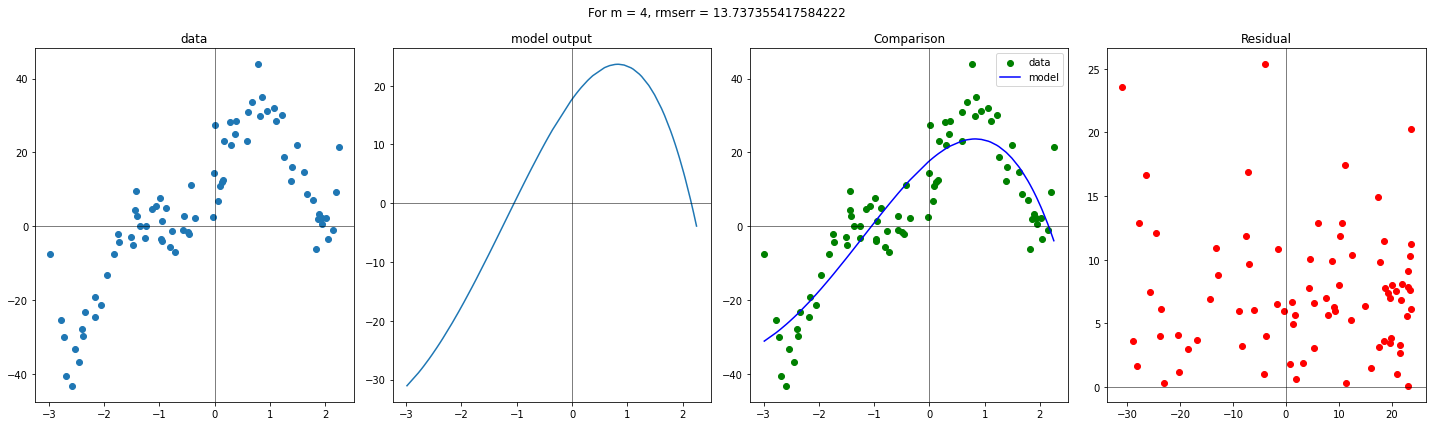

<class 'numpy.ndarray'>


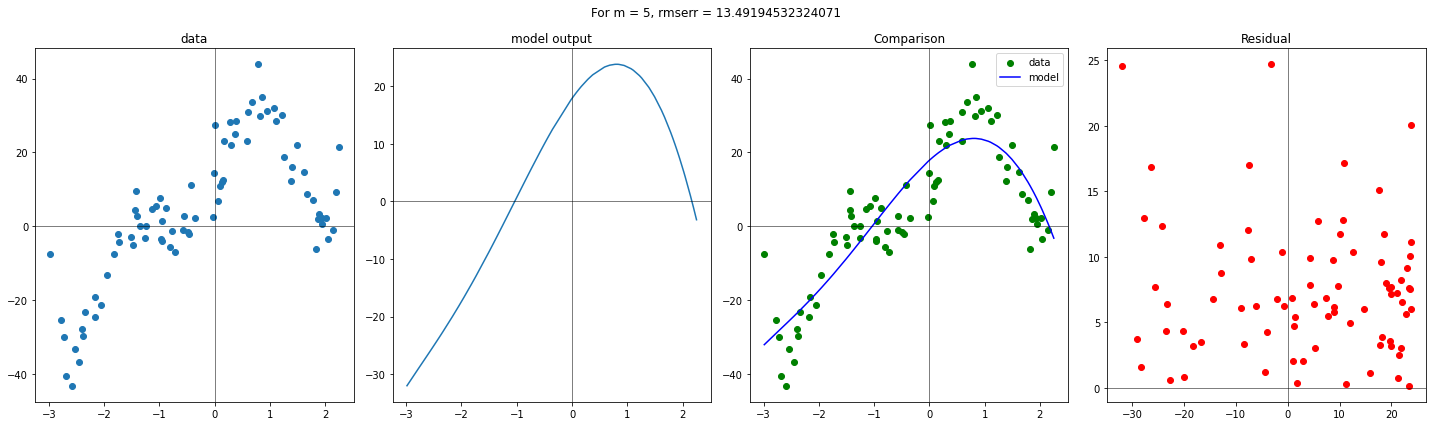

<class 'numpy.ndarray'>


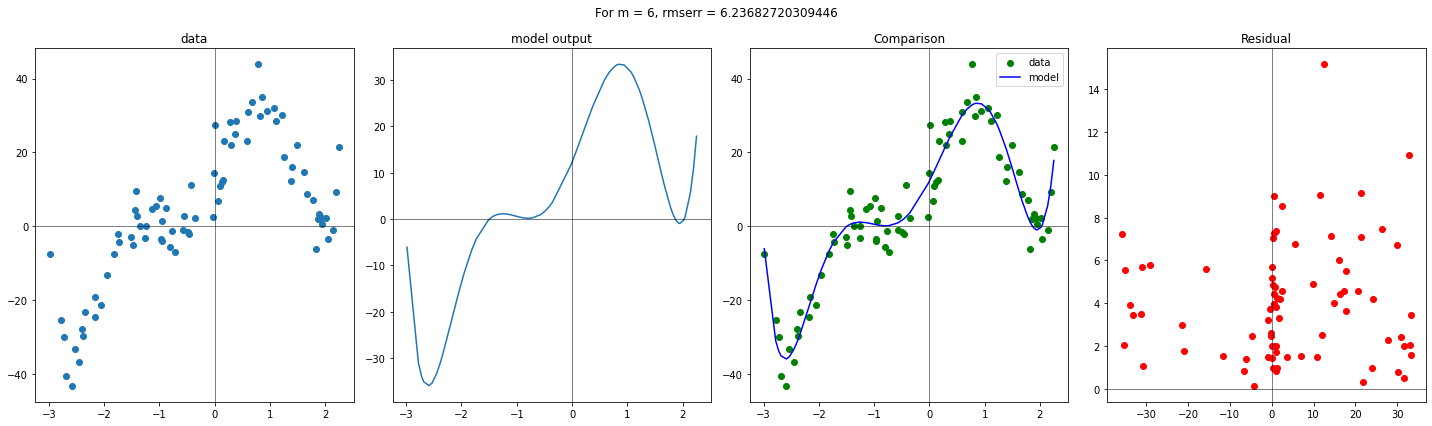

<class 'numpy.ndarray'>


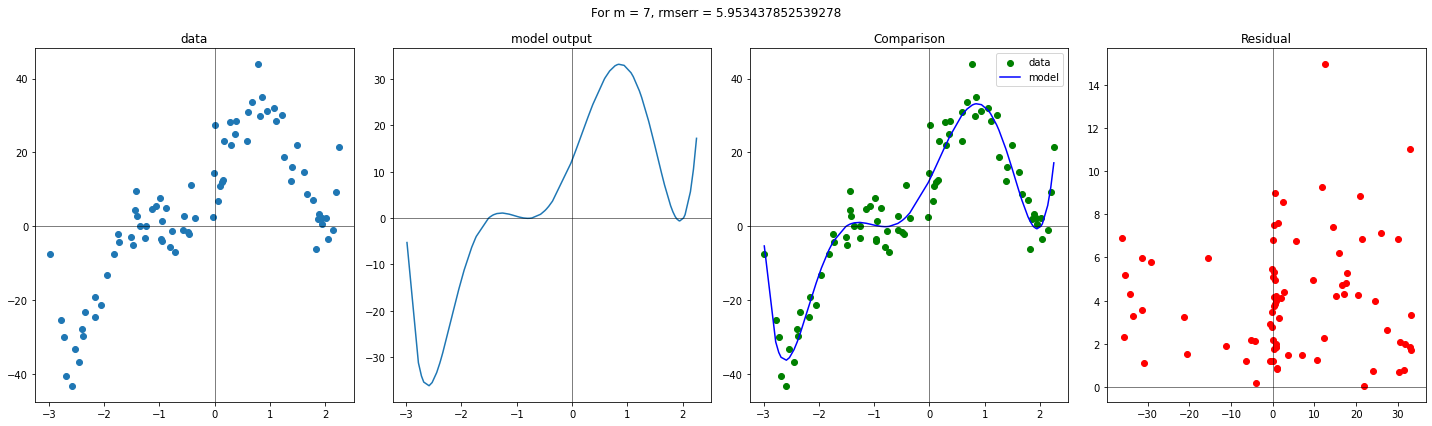

<class 'numpy.ndarray'>


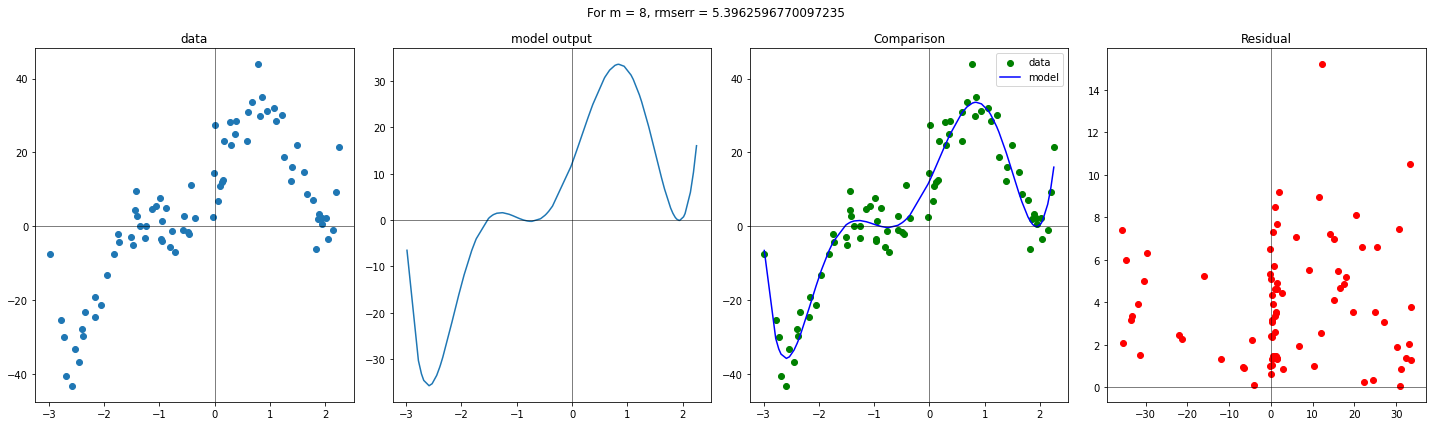

<class 'numpy.ndarray'>


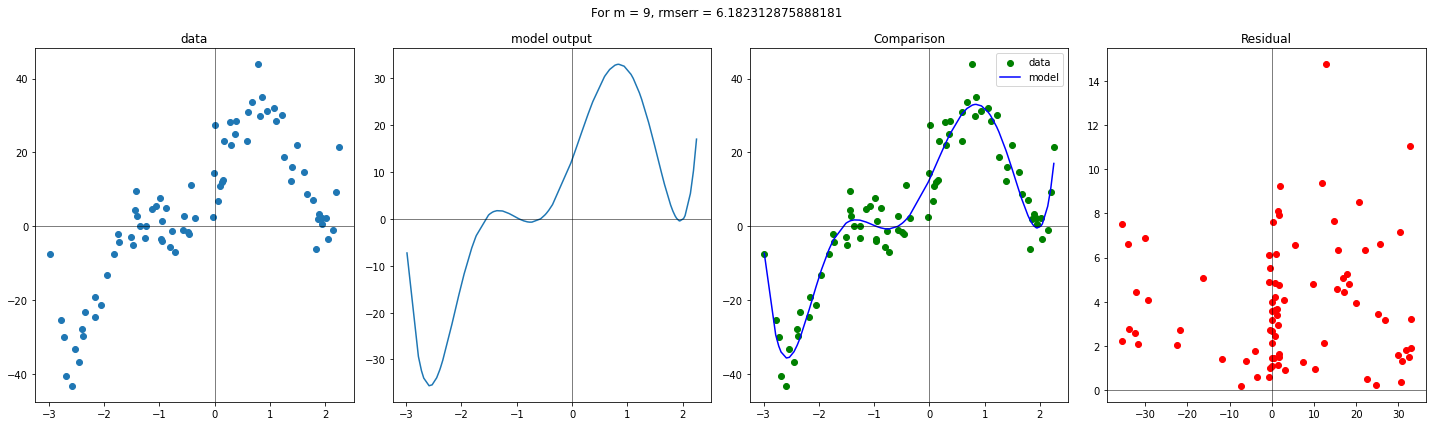

<class 'numpy.ndarray'>


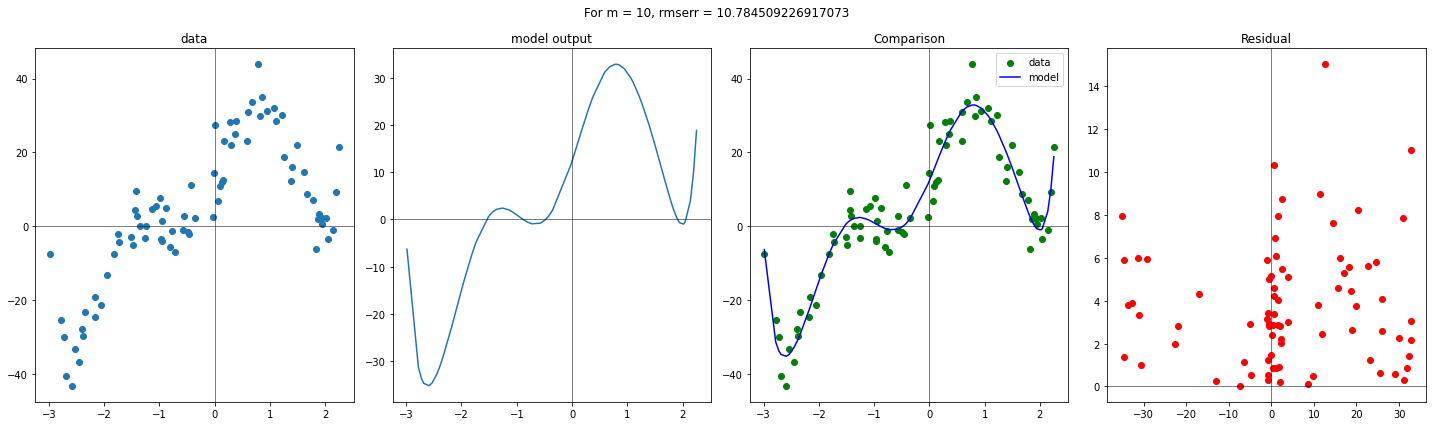

<class 'numpy.ndarray'>


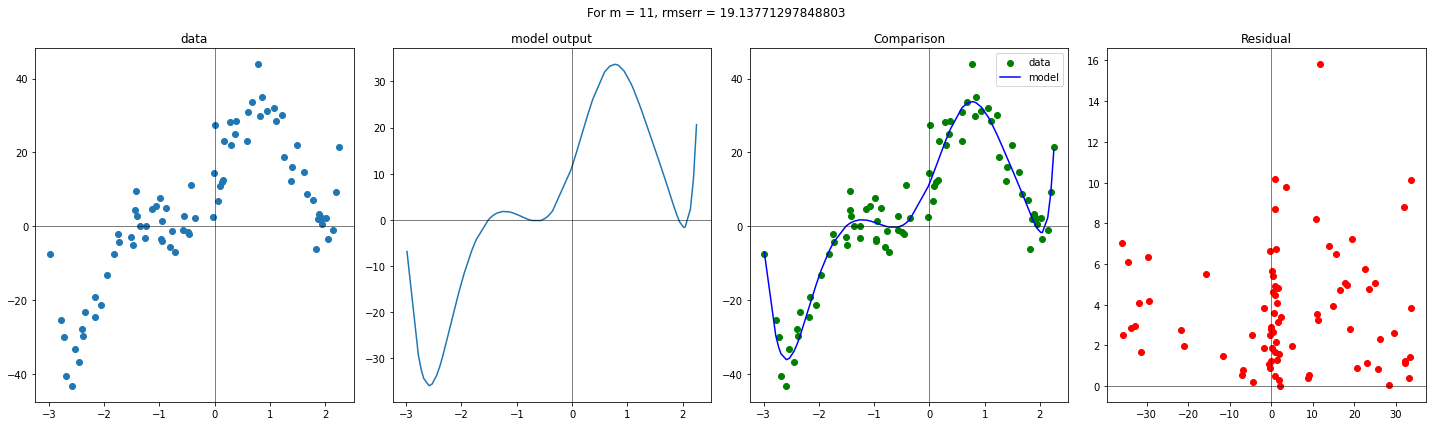

<class 'numpy.ndarray'>


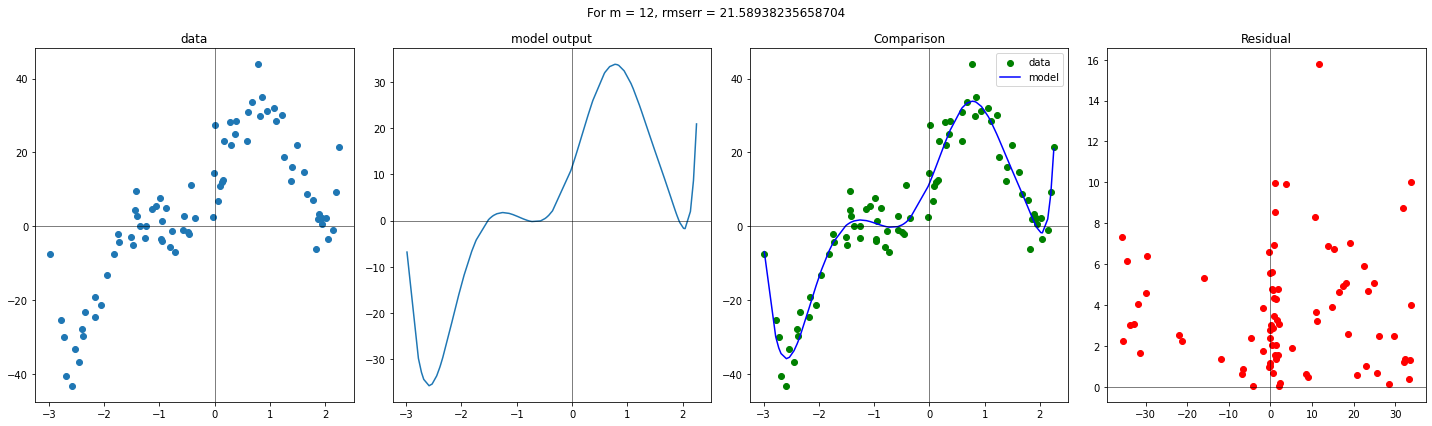

<class 'numpy.ndarray'>


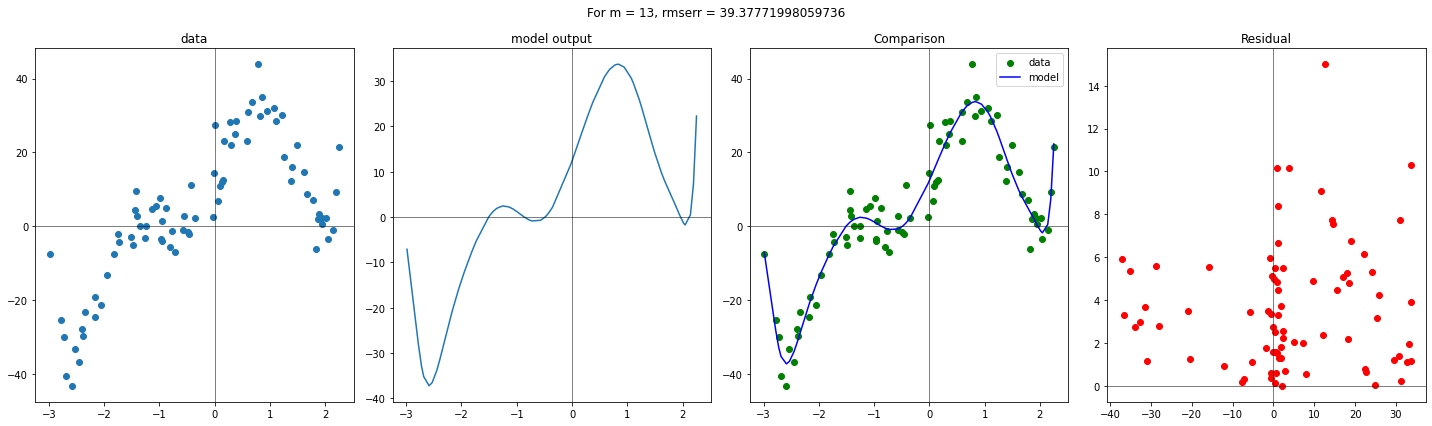

<class 'numpy.ndarray'>


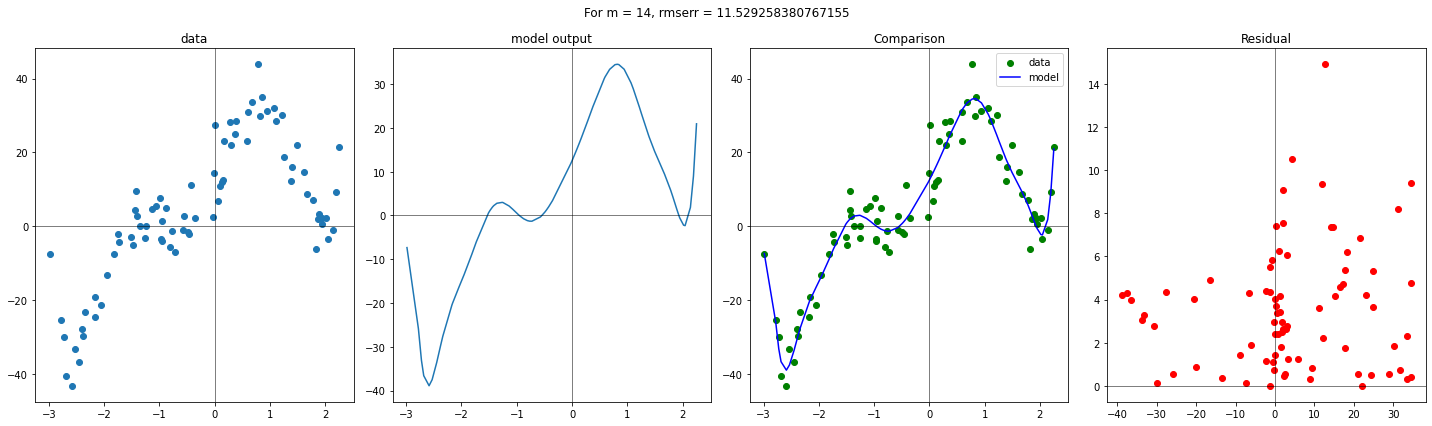

[5.3962596770097235,
 array([[ 12.19031173],
        [ 32.46519222],
        [ 12.45283274],
        [-20.21906988],
        [ -9.58683972],
        [  3.8566704 ],
        [  1.49742261],
        [ -0.15205477],
        [ -0.04378912]]),
 9]

In [31]:
mod = PF.fit_model(print_graphs=True)
mod

<class 'numpy.ndarray'>


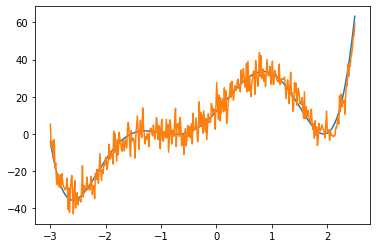

In [32]:
plt.plot(X, PF.check(mod[1], X))
plt.plot(X, Y)